In [1]:
import sys
try:
    from google.colab import drive
    drive.mount("/content/drive")
    main_path = '/content/drive/My Drive/lee_mcc9/'
except:
    main_path = ''
sys.path.append(main_path)

In [114]:
import uproot
import numpy as np
import math
import matplotlib.pyplot as plt

fold = "nuselection"
tree = "NeutrinoSelectionFilter"

variables = [
    "shr_dedx_Y", "shr_bkt_pdg", "p", "pt", "selected", "nu_pdg", "shr_theta",
    "slpdg", "trk_score_v", "shr_theta_v", "shr_score_v",
    "shr_pfp_id_v", "category", "shr_tkfit_dedx_Y", "trk_pfp_id",
    "shr_energy_tot", "trk_energy_tot", "shr_hits_tot", "ccnc", "trk_chipr",
    "trk_bkt_pdg", "hits_ratio", "n_tracks_contained", "shr_dedx_y_v",
    "nproton", "nu_e", "n_showers_contained", "shr_distance", "trk_distance",
    "hits_y", "shr_pz", "shr_energy", "shr_dedx_U", "shr_dedx_V", "shr_phi", "trk_phi", "trk_theta",
    "shr_tkfit_dedx_U", "shr_tkfit_dedx_V", "run", "sub", "evt", "nproton", "trk_pid_chipr_v",
    "trk_len", "slnunhits", "slnhits", "shr_score", "trk_score", "trk_hits_tot",
    "true_e_visible", "matched_E", "shr_bkt_E", "trk_bkt_E", "trk_energy", "tksh_distance", "tksh_angle",
    "trk_chipr_best", "trk_chipr_worst", "trk_pida", "trk_chimu", "CosmicIP", "trk_bragg_p", "trk_bragg_mu",
    "trk_bragg_mip", "shr_chipr", "shr_bragg_p", "shr_bragg_mu", "shr_chimu",
    "shr_pca_2", "shr_pca_0", "shr_pca_1", "npi0", "gamma1_edep", "gamma2_edep", "topological_score",
    "pi0_e", "shr_energy_tot_cali", "shr_dedx_Y_cali", "evnunhits", "nslice" #, "crtveto", "crthitpe",
#    "_closestNuCosmicDist"
]


nue = {
    r"$\nu_e$ + CORSIKA" : uproot.open(main_path+"root_files/nue_corsika.root")[fold][tree].pandas.df(variables, flatten=False),
    "Set A" :  uproot.open(main_path+"root_files/seta.root")[fold][tree].pandas.df(variables, flatten=False),
    "Set B" :  uproot.open(main_path+"root_files/setb.root")[fold][tree].pandas.df(variables, flatten=False),
    "Set C" :  uproot.open(main_path+"root_files/setc.root")[fold][tree].pandas.df(variables, flatten=False),
    "Set D" :  uproot.open(main_path+"root_files/setd.root")[fold][tree].pandas.df(variables, flatten=False),
    "Set E" :  uproot.open(main_path+"root_files/setd.root")[fold][tree].pandas.df(variables, flatten=False)
}

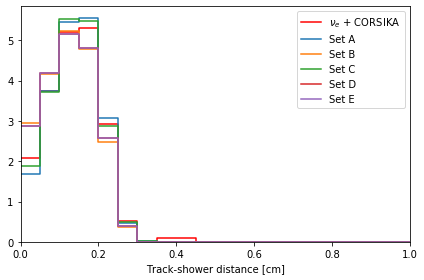

In [119]:
x_range = 0,1
n_bins = 20
var_name = "shr_energy_tot_cali"
n_nue = {}

for sample in nue:
    nue[sample]["reco_e"] = (nue[sample]["shr_energy_tot_cali"] + 0.030) / 0.79 + nue[sample]["trk_energy_tot"]

    nue_tree = nue[sample]

    nue_queried_tree = nue_tree.query("selected==1 & nu_e < 0.4")
    nue_variable = nue_queried_tree[var_name]

    n, bins = np.histogram(
        nue_variable,
        range=x_range,
        bins=n_bins,
        density=True,
    )
    
    n_nue[sample] = n

for sample in nue:
    left,right = bins[:-1],bins[1:]
    X = np.array([left,right]).T.flatten()
    Y = np.array([n_nue[sample],n_nue[sample]]).T.flatten()
    if sample == r"$\nu_e$ + CORSIKA":
        plt.plot(X,Y,label=sample, color="r")
    else:
        plt.plot(X,Y,label=sample)

plt.xlabel(r"Track-shower distance [cm]")
plt.xlim(x_range[0],x_range[1])
plt.ylim(ymin=0)
plt.legend()
plt.tight_layout()
plt.savefig("plots/cheated.pdf")